In [1]:
import pickle as pk
import glob
from utils.utils import graph_plot
import torch
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [2]:
file='experimento_fing3T1N_10rep_5pasos.pkl'
with open(file, 'rb') as f:
    exp_dict = pk.load(f)

print(exp_dict[0].keys())

dict_keys(['free_hist', 'reconfig_hist', 'model_y', 'max_model_y'])


In [64]:
free_hist=exp_dict[0]['free_hist']
reconfig_hist=exp_dict[0]['reconfig_hist']
model_y=exp_dict[0]['model_y']
max_model_y=exp_dict[0]['max_model_y']    


In [61]:
print(max_model_y[0])
print(model_y[0][0,0])

-1.7637194395065308
-2.8668764


In [7]:
matr_diff=np.empty((len(exp_dict.keys()),len(exp_dict[0]['max_model_y'])))
for exp in exp_dict.keys():
    model_y=exp_dict[exp]['model_y']
    max_model_y=exp_dict[exp]['max_model_y']    
    
    for i in range(len(max_model_y)):
        matr_diff[exp,i]=-(max_model_y[i]-model_y[i][0,0])/max_model_y[i]
    
        

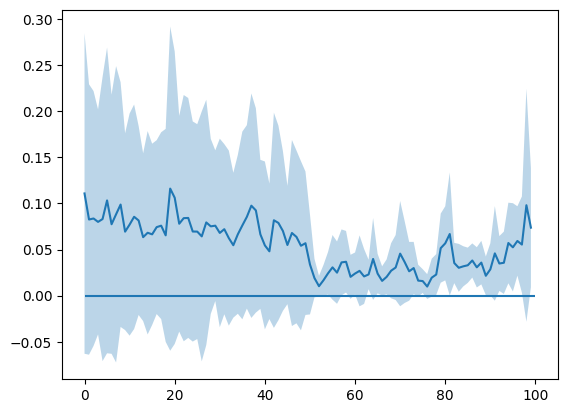

In [13]:
medias = np.mean(matr_diff, axis=0)
std = np.std(matr_diff, axis=0)
plt.plot(medias)
plt.fill_between(range(len(medias)), medias-std, medias+std, alpha=0.3)
#for i in range(matr_diff.shape[0]):
#    plt.plot(matr_diff[i,:])
plt.hlines(0,0,len(medias))

In [34]:
from IPython.display import HTML

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Inicialización de la línea y el scatter
line, = ax1.plot( [],[], 'r-',label='dif_opt')
scatter1 = ax2.scatter([1],[1],label='free_agents')
scatter2 = ax2.scatter([2],[2],label='reconfig_agents')
# Configuración de los ejes
ax1.set_xlim(0, 100)
#ax1.set_ylim(-4, 0)
ax1.set_title('Evolución de una línea')

ax2.set_xlim(0, 12)
ax2.set_ylim(0, 12)
ax2.set_title('Scatter de puntos en movimiento')

# Función de actualización para la animación
def update(frame):
    # Actualizar la línea
    ind=np.arange(0,frame)
    line.set_data(dif_c[:frame],ind)

    # Actualizar el scatter
    scatter1.set_offsets(free_hist[frame])
    scatter2.set_offsets(reconfig_hist[frame])
    return line, scatter1, scatter2

# Crear la animación
ani = animation.FuncAnimation(fig, update, frames=range(0, len(free_hist)), blit=True)

#plt.show()
#HTML(ani.to_jshtml())


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (0,) and arg 1 with shape (2,).

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (0,) and arg 1 with shape (2,).

<Figure size 1000x500 with 2 Axes>